# 上傳檔案

In [12]:
# 上傳檔案 datasets.zip
from google.colab import files
files.upload();

Saving datasets.zip to datasets.zip


# 解壓縮

In [14]:
#解壓縮
!unzip datasets.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: datasets/test/images/IMG_2322_jpeg.rf.b747edca9d57eb95bb6885d5e663995a.jpg  
  inflating: datasets/test/images/IMG_2324_jpeg.rf.e97aaa971788d796fb2c22d500894ba2.jpg  
  inflating: datasets/test/images/IMG_2330_jpeg.rf.8079429ab91bd2854847dfb4786fbf74.jpg  
   creating: datasets/test/labels/
  inflating: datasets/test/labels/IMG_1909_jpg.rf.3f2bde8dc899b141a4361677e55242e4.txt  
  inflating: datasets/test/labels/IMG_1911_jpg.rf.b90b1b78414e7535403e2ae58398e887.txt  
  inflating: datasets/test/labels/IMG_1916_jpg.rf.9ff79d6df874376b2bf440c5248a166e.txt  
  inflating: datasets/test/labels/IMG_1919_jpg.rf.2e943ba3e529eab0f42446e1b5d74844.txt  
  inflating: datasets/test/labels/IMG_1935_jpg.rf.0bf8106bcf2fef4680453d60f4c0b125.txt  
  inflating: datasets/test/labels/IMG_1948_jpg.rf.8e9775e3ab62fb1f11d56e19711cb7aa.txt  
  inflating: datasets/test/labels/IMG_1949_jpg.rf.27364ceec280781292c223bdfe91e11c.txt  
  inflating: datasets/test/labels/IMG_1950_jpg.rf.6

## 上傳 data.yaml 檔案

In [15]:
# 上傳檔案 data.yaml
from google.colab import files
files.upload();

Saving data.yaml to data.yaml


## 安裝 ultralytics 

In [27]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 模型訓練

In [29]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/data.yaml epochs=5 imgsz=640

Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplif

## 模型評分

In [31]:
!yolo task=detect mode=val model=/content/runs/detect/train5/weights/best.pt data=/content/datasets/data.yaml

Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100% 75/75 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 30, len(boxes) = 95. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:03<00:00,  1.32it/s]
                   all         75         95      0.934      0.862      0.954      0.894
            fifty-back         75         10      0.976          1      0.995      0.947
           fifty-front         75          5          1      0.932      0.995      0.901
             five-back         75          8      0.

## 顯示偵測圖片
可以看到大部分紙鈔都被加辨識框

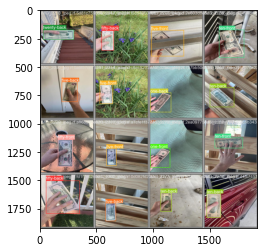

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import os

image = img.imread('/content/runs/detect/val/val_batch1_labels.jpg')                       # 讀取圖片
plt.imshow(image)                                 
plt.show()                                    

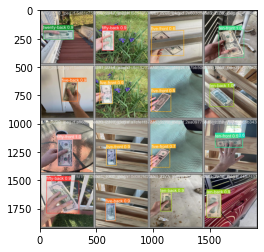

In [42]:
image = img.imread('/content/runs/detect/val/val_batch1_pred.jpg')                       # 讀取圖片
plt.imshow(image)                                 
plt.show()  

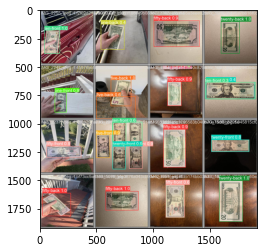

In [43]:
image = img.imread('/content/runs/detect/val/val_batch2_pred.jpg')                       # 讀取圖片
plt.imshow(image)                                 
plt.show()  

## 預測

In [35]:
!yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt conf=0.25 source=/content/datasets/test/images

Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

image 1/44 /content/datasets/test/images/IMG_1909_jpg.rf.3f2bde8dc899b141a4361677e55242e4.jpg: 640x640 1 twenty-back, 17.1ms
image 2/44 /content/datasets/test/images/IMG_1911_jpg.rf.b90b1b78414e7535403e2ae58398e887.jpg: 640x640 1 twenty-back, 17.1ms
image 3/44 /content/datasets/test/images/IMG_1916_jpg.rf.9ff79d6df874376b2bf440c5248a166e.jpg: 640x640 1 twenty-front, 17.1ms
image 4/44 /content/datasets/test/images/IMG_1919_jpg.rf.2e943ba3e529eab0f42446e1b5d74844.jpg: 640x640 1 twenty-front, 17.1ms
image 5/44 /content/datasets/test/images/IMG_1935_jpg.rf.0bf8106bcf2fef4680453d60f4c0b125.jpg: 640x640 1 twenty-back, 17.1ms
image 6/44 /content/datasets/test/images/IMG_1948_jpg.rf.8e9775e3ab62fb1f11d56e19711cb7aa.jpg: 640x640 1 fifty-front, 17.1ms
image 7/44 /content/datasets/test/images/IMG_1949_jpg.rf.27364ceec280781292c223